In [28]:
import qiskit
import pytket
from matplotlib import pyplot as plt

First create the circuit

In [29]:
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import TruthTableOracle
from qiskit import IBMQ

oracle = TruthTableOracle('0100')
grover = Grover(oracle)
circuit = grover.construct_circuit(measurement= True)

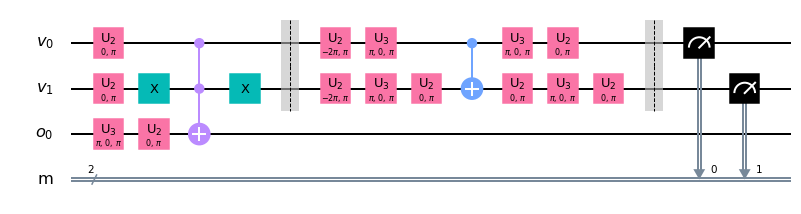

In [30]:
circuit.draw('mpl')

Convert the circuit to tket

In [31]:
provider = IBMQ.load_account()
qiskit_backend= provider.get_backend("ibmq_16_melbourne")

/home/tim/anaconda3/envs/planqk/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-11-30 11:19:17,052: Credentials are already in use. The existing account in the session will be replaced.


In [32]:
from qiskit import transpile

In [33]:
bcircuit = transpile(circuit, backend= qiskit_backend, optimization_level= 2)

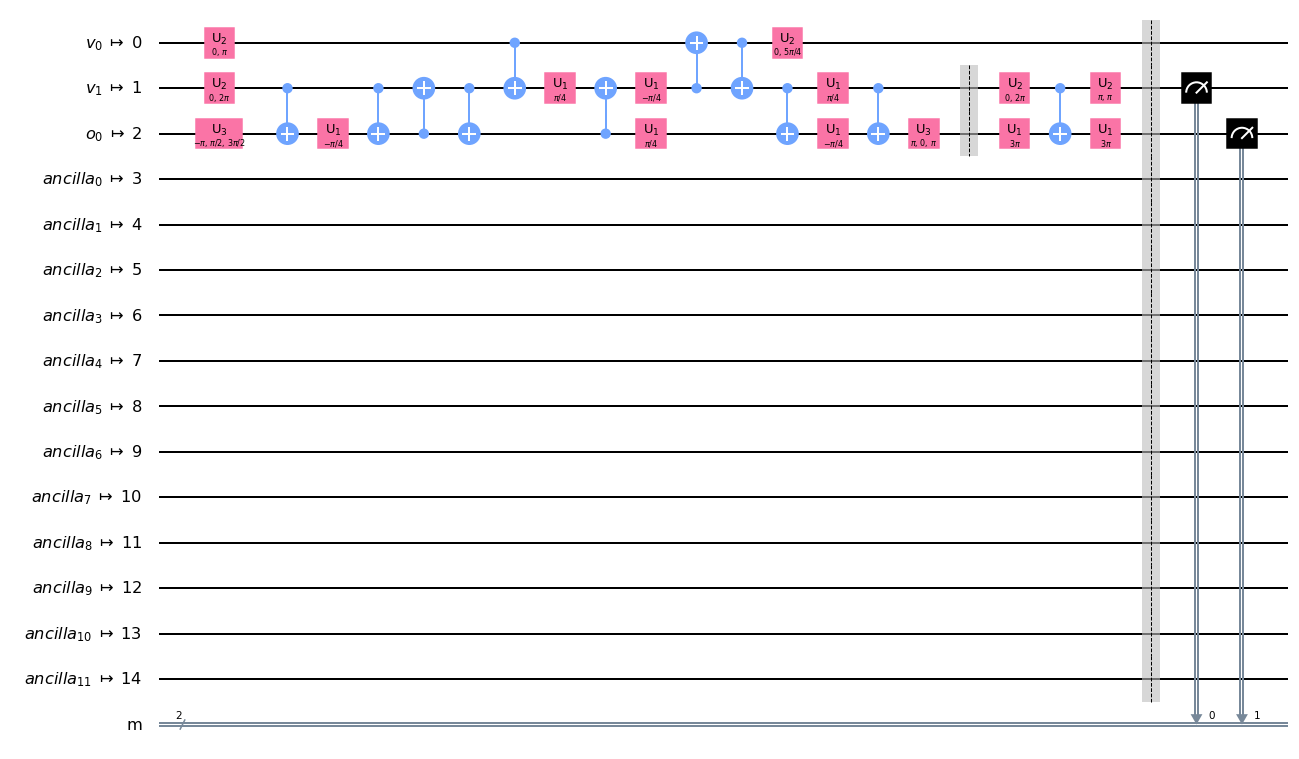

In [34]:
bcircuit.draw('mpl')

In [35]:
bcircuit.depth()

20

In [36]:
from pytket.qiskit import qiskit_to_tk
circuit = qiskit_to_tk(circuit)

In [37]:
circuit

[U3(1*PI, 0*PI, 1*PI) o[0]; U2(0*PI, 1*PI) v[0]; U2(0*PI, 1*PI) v[1]; U2(0*PI, 1*PI) o[0]; X v[1]; CCX v[0], v[1], o[0]; X v[1]; Barrier v[0], v[1]; U2(0*PI, 1*PI) v[0]; U2(0*PI, 1*PI) v[1]; U3(1*PI, 0*PI, 1*PI) v[0]; U3(1*PI, 0*PI, 1*PI) v[1]; U2(0*PI, 1*PI) v[1]; CX v[0], v[1]; U3(1*PI, 0*PI, 1*PI) v[0]; U2(0*PI, 1*PI) v[1]; U2(0*PI, 1*PI) v[0]; U3(1*PI, 0*PI, 1*PI) v[1]; U2(0*PI, 1*PI) v[1]; Barrier v[0], v[1]; Measure v[0] --> m[0]; Measure v[1] --> m[1]; ]

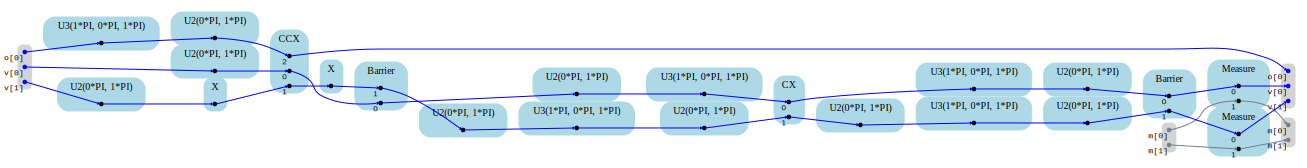

In [38]:
from pytket.utils import Graph
Graph(circuit).get_DAG()

In [39]:
circuit.depth()

14

In [40]:
from pytket.backends.ibm import IBMQBackend
backend = IBMQBackend("ibmq_16_melbourne");

In [41]:
backend.compile_circuit(circuit, optimisation_level= 1)

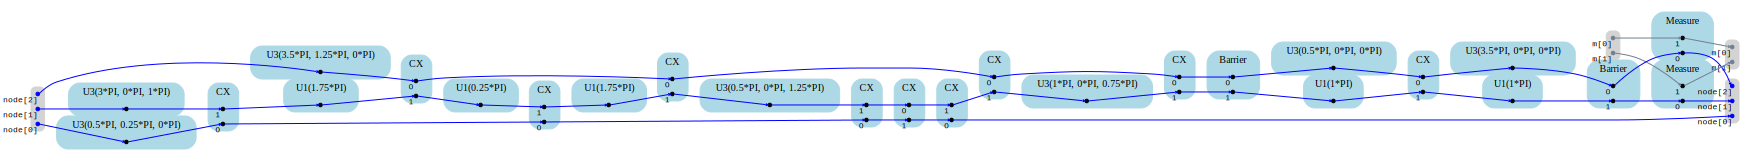

In [42]:
Graph(circuit).get_DAG()

In [43]:
circuit.depth()

21

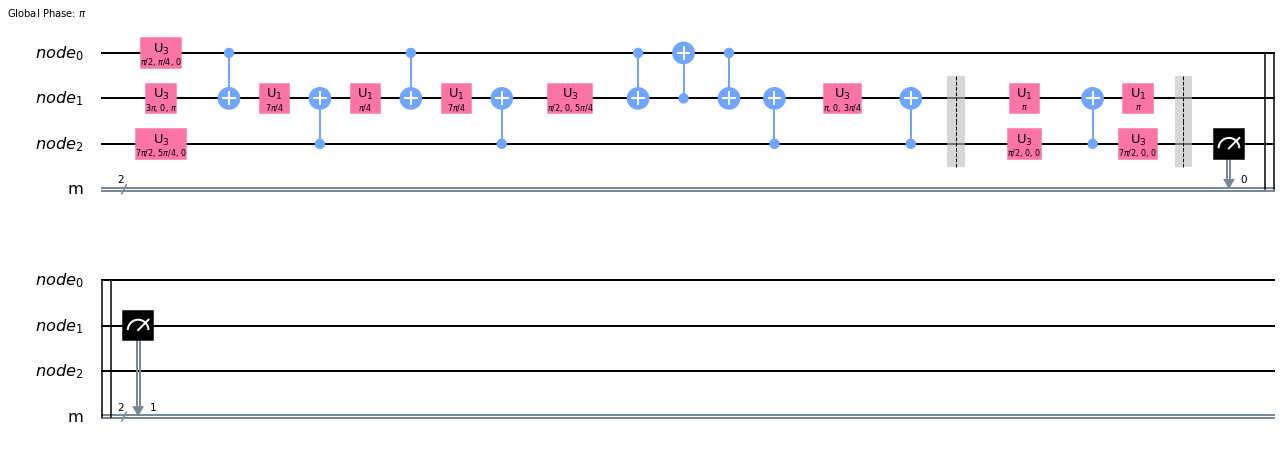

In [44]:
from pytket.qiskit import qiskit_to_tk, tk_to_qiskit
tk_to_qiskit(circuit).draw('mpl')

In [45]:
tk_to_qiskit(circuit).depth()

19

In [18]:
backend.device.nodes

[node[0],
 node[1],
 node[2],
 node[3],
 node[4],
 node[5],
 node[6],
 node[7],
 node[8],
 node[9],
 node[10],
 node[11],
 node[12],
 node[13],
 node[14]]

In [19]:
from pytket.qasm import circuit_to_qasm_str, circuit_from_qasm_str
qasm = circuit_to_qasm_str(circuit)
print(qasm)

OPENQASM 2.0;
include "qelib1.inc";

qreg node[3];
creg m[2];
u3(0.5*pi,0.25*pi,0.0*pi) node[0];
u3(3.0*pi,0.0*pi,1.0*pi) node[1];
u3(3.5*pi,1.25*pi,0.0*pi) node[2];
cx node[0],node[1];
u1(1.75*pi) node[1];
cx node[2],node[1];
u1(0.25*pi) node[1];
cx node[0],node[1];
u1(1.75*pi) node[1];
cx node[2],node[1];
u3(0.5*pi,0.0*pi,1.25*pi) node[1];
cx node[0],node[1];
cx node[1],node[0];
cx node[0],node[1];
cx node[2],node[1];
u3(1.0*pi,0.0*pi,0.75*pi) node[1];
cx node[2],node[1];
barrier node[2],node[1];
u1(1.0*pi) node[1];
u3(0.5*pi,0.0*pi,0.0*pi) node[2];
cx node[2],node[1];
u1(1.0*pi) node[1];
u3(3.5*pi,0.0*pi,0.0*pi) node[2];
barrier node[2],node[1];
measure node[2] -> m[0];
measure node[1] -> m[1];



In [20]:
qasm = qasm.replace('FCNode', 'fcnode')
circuit = circuit_from_qasm_str(qasm)

In [21]:
set(map( lambda q : q.reg_name  ,circuit.qubits)).pop()

'node'

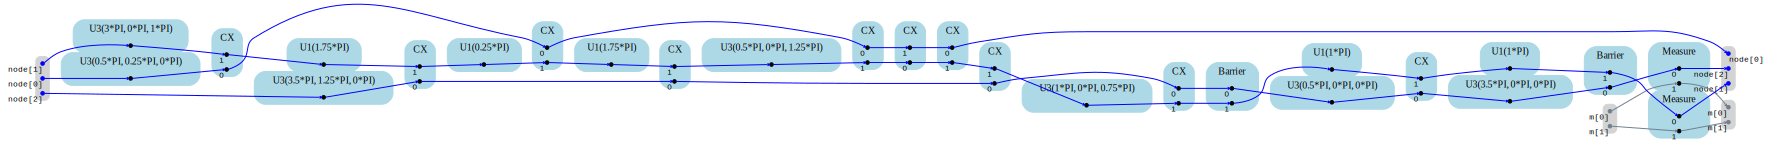

In [22]:
Graph(circuit).get_DAG()

In [23]:
job = backend.process_circuit(circuit, n_shots=1000, valid_check= False)

In [24]:
job

ResultHandle('5fc4c664176371001a2224b0', 0)

In [25]:
status = backend.circuit_status(job)

In [26]:
status

CircuitStatus(status=<StatusEnum.QUEUED: 'Circuit is queued.'>, message='job is queued')

In [27]:
result = backend.get_result(job)

Job Status: job is queued (None)

KeyboardInterrupt: 

In [ ]:
result.get_counts()